<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.5%20Regresi%C3%B3n%20Lineal%20Simple%20y%20M%C3%BAltiple/Act_3_5_Regresi%C3%B3n_Lineal_Simple_y_M%C3%BAltiple__Filtro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Datos_limpios (4).csv")

In [ ]:
df.head(5)

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,Marco,2013-01-21,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1652.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.41
1,1,2024-06-27,city scrape,Villa Dante,Dici,2010-06-28,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,...,1.0,3663.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
2,2,2024-06-28,city scrape,CONDESA HAUS B&B,Fernando,2010-08-09,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,...,1.9,1477.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.42
3,3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,Martina,2013-01-09,"['email', 'phone']",t,t,Miguel Hidalgo,...,3.0,814.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.19
4,4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",Nicholas,2011-01-04,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1923.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.32


In [ ]:
filtro2 = df[df["room_type"] == "Private room"]
filtro2

,Unnamed: 0,last_scraped,source,name,host_name,host_since,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
10,10,2024-06-28,previous scrape,MARIA DEL ALMA,Fernando,2011-05-31,['phone'],t,f,Coyoacán,...,1.9,1477.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
13,13,2024-06-27,city scrape,"OASIS IN COYOACAN, SHARED HOUSE",Edoardo,2012-01-28,"['email', 'phone']",t,t,Coyoacán,...,1.0,366.0,4.97,4.91,4.91,4.91,4.95,4.94,4.89,0.51
14,14,2024-06-28,city scrape,Cool room near WTC and Metrobus,Carlos,2011-07-13,"['email', 'phone']",t,t,Benito Juárez,...,1.0,315.0,4.84,4.87,4.61,4.98,4.95,4.97,4.81,0.85
15,15,2024-06-28,city scrape,Chilango chic: room historic Condesa DF,Citlalli,2014-10-10,"['email', 'phone']",t,f,Cuauhtémoc,...,1.0,898.0,4.83,4.60,4.97,4.97,4.77,4.93,4.73,0.22
17,17,2024-06-27,city scrape,"Villa Alfonsina, Heart of Coyoacan",Héctor,2013-04-10,"['email', 'phone']",t,t,Coyoacán,...,1.0,1200.0,4.93,4.94,4.97,4.96,4.91,4.97,4.94,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,26510,2024-06-27,city scrape,Habitación ideal para 1 persona,Paty,2015-08-16,"['email', 'phone']",t,t,Benito Juárez,...,1.0,365.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
26514,26514,2024-06-28,city scrape,Habitación en Renta,Jessica Arely,2018-08-19,"['email', 'phone']",t,t,Benito Juárez,...,1.0,450.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
26515,26515,2024-06-27,city scrape,Habitación Majo,Mariana,2016-12-27,"['email', 'phone']",t,t,Gustavo A. Madero,...,1.0,509.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70
26519,26519,2024-06-28,city scrape,Estudio cama king con sofá cama (cocineta parc...,Said,2023-07-10,"['email', 'phone']",t,t,Cuauhtémoc,...,2.0,1939.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.70


In [ ]:
Vars_indep = filtro2[['host_response_rate']]
Vars_dep = filtro2['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.46826819]),
 'rank_': 1,
 'singular_': array([740.92520704]),
 'intercept_': 45.791224826721404}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['host_response_rate']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes


array([89.94891493, 92.6180436 , 92.6180436 , ..., 92.6180436 ,
       84.65748441, 89.94891493])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones', y_pred)

#

<Axes: xlabel='host_response_rate', ylabel='predicciones'>

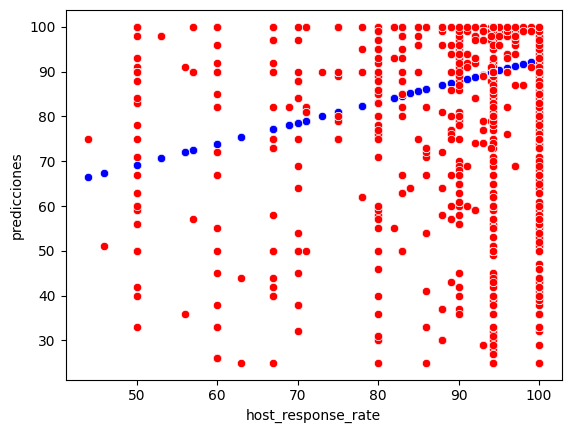

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='host_response_rate', y='predicciones', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.06622297681388678

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.2573382536932408

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro2[['price']]
Vars_dep = filtro2['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0002403]),
 'rank_': 1,
 'singular_': array([74526.36115531]),
 'intercept_': 90.45406731781094}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['price']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([90.80898553, 90.54201591, 90.52976077, ..., 90.57637833,
       90.9200026 , 90.62708093])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones_1', y_pred)

#

<Axes: xlabel='price', ylabel='predicciones_1'>

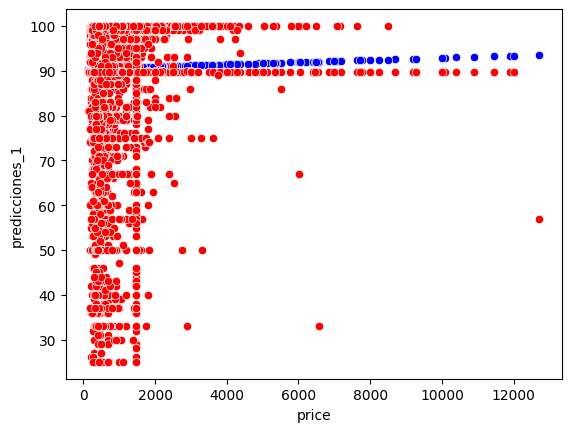

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='price', y='predicciones_1', color="blue", data=filtro2)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.000176435532326491

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.013282903761094221

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro2[['number_of_reviews']]
Vars_dep = filtro2['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07192254]),
 'rank_': 1,
 'singular_': array([3908.67886565]),
 'intercept_': 88.82638149747997}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([88.8263815 , 93.5732691 , 96.52209322, ..., 88.8263815 ,
       88.8263815 , 88.8263815 ])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones_2', y_pred)


<Axes: xlabel='number_of_reviews', ylabel='predicciones_2'>

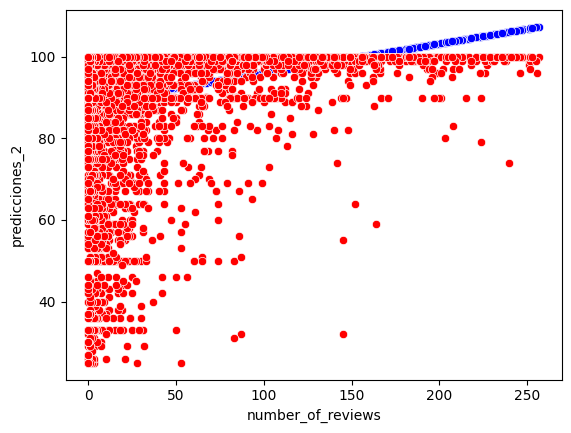

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='predicciones_2', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.04347710890933709

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.20851165173518982

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro2[['review_scores_cleanliness']]
Vars_dep = filtro2['review_scores_location']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.22869136]),
 'rank_': 1,
 'singular_': array([20.09476692]),
 'intercept_': 3.76700322828563}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['review_scores_cleanliness']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([4.86472175, 4.8898778 , 4.82127039, ..., 4.86472175, 4.86472175,
       4.86472175])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones_3', y_pred)

#

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

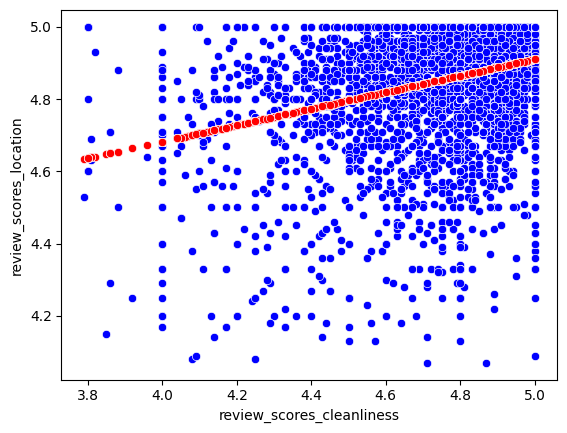

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro2)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_3', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.11371729146516996

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.3372199452362952

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro2[['number_of_reviews']]
Vars_dep = filtro2['availability_365']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1619386]),
 'rank_': 1,
 'singular_': array([3908.67886565]),
 'intercept_': 217.67253456091757}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['number_of_reviews']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([217.67253456, 228.36048189, 234.99996432, ..., 217.67253456,
       217.67253456, 217.67253456])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones_5', y_pred)

#

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

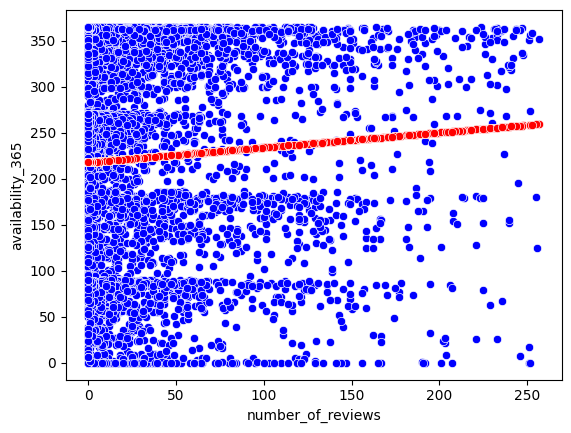

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.002768385585334987

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.05261545006302794

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = filtro2[['review_scores_communication']]
Vars_dep = filtro2['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)
#Ya encontro la mejor ecuacion con la sumatoria del error cuadratico menor

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.27314727]),
 'rank_': 1,
 'singular_': array([16.23234694]),
 'intercept_': 2.594716512428438}

In [ ]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predcit(X=df[['alcohol', 'speeding']])
y_pred = model.predict(X=filtro2[['review_scores_communication']])
y_pred
#Toma cada registro del alcohol y esta prediciendo el valor total de accidentes

array([1.28360963, 1.24263754, 1.24263754, ..., 1.28360963, 1.28360963,
       1.28360963])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
filtro2.insert(0, 'predicciones_6', y_pred)

#

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

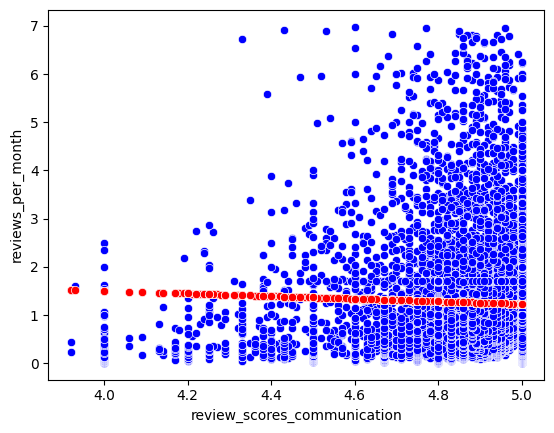

In [ ]:
#Visualizamod la gráfica comparativa entre el total real y el total del parecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro2)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color="red", data=filtro2)
#sns.lineplot(x=alcohol', y='predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter = model.score(Vars_indep, Vars_dep)
coef_Deter
#

0.001655333247885582

In [ ]:
#Corroboramos cual es el coeficinete de la correlación de nuestro modelo (R)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl
#

0.04068578680430774